In [1]:
# !pip install seaborn

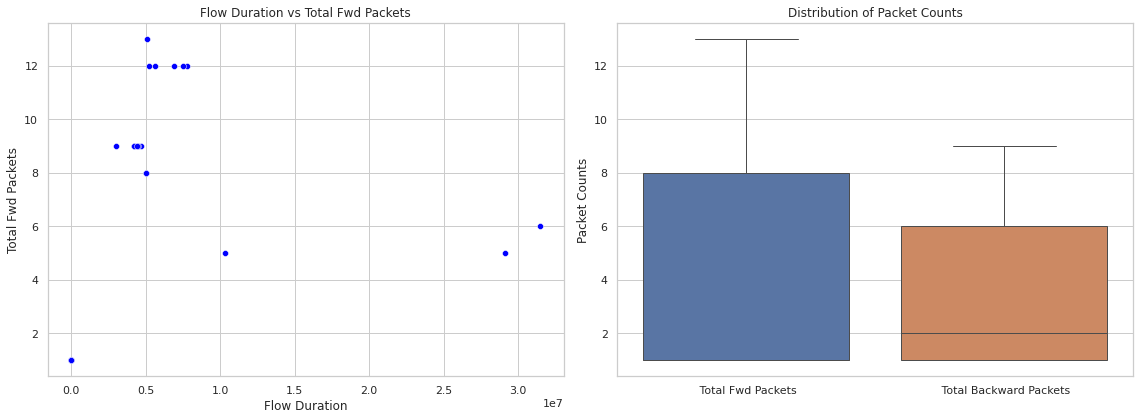

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 加载数据
file_path = './class_split/WebDDoS.csv'
data = pd.read_csv(file_path)

# 设置绘图样式
sns.set(style="whitegrid")

# 创建一个图形框架
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 散点图：流持续时间与前向数据包数量
sns.scatterplot(ax=axes[0], x=data[' Flow Duration'], y=data[' Total Fwd Packets'], color='blue')
axes[0].set_title('Flow Duration vs Total Fwd Packets')
axes[0].set_xlabel('Flow Duration')
axes[0].set_ylabel('Total Fwd Packets')

# 箱线图：前向和后向数据包的分布
sns.boxplot(data=data[[' Total Fwd Packets', ' Total Backward Packets']], ax=axes[1])
axes[1].set_title('Distribution of Packet Counts')
axes[1].set_ylabel('Packet Counts')

plt.tight_layout()
plt.show()



In [3]:
# 打印数据集中的所有列名
print(data.columns)


Index([' Source Port', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packe

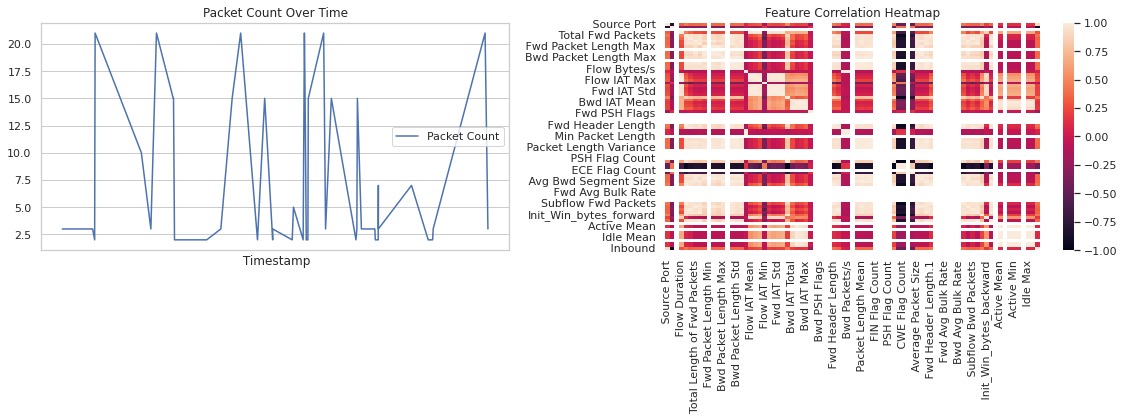

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 加载数据
file_path = './class_split/WebDDoS.csv'
data = pd.read_csv(file_path)

# 将时间列转换为 datetime 类型
data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])

# 筛选出数值型数据列
numeric_data = data.select_dtypes(include=[np.number])

# 设置绘图样式
sns.set(style="whitegrid")

# 创建图形框架，一行两列
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 时间序列分析：数据包数量随时间的变化
data.sort_values(' Timestamp', inplace=True)
data['Packet Count'] = data[' Total Fwd Packets'] + data[' Total Backward Packets']
data.plot(x=' Timestamp', y='Packet Count', ax=axes[0], title='Packet Count Over Time')

# 热图：特征间的相关性
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, ax=axes[1])
axes[1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()


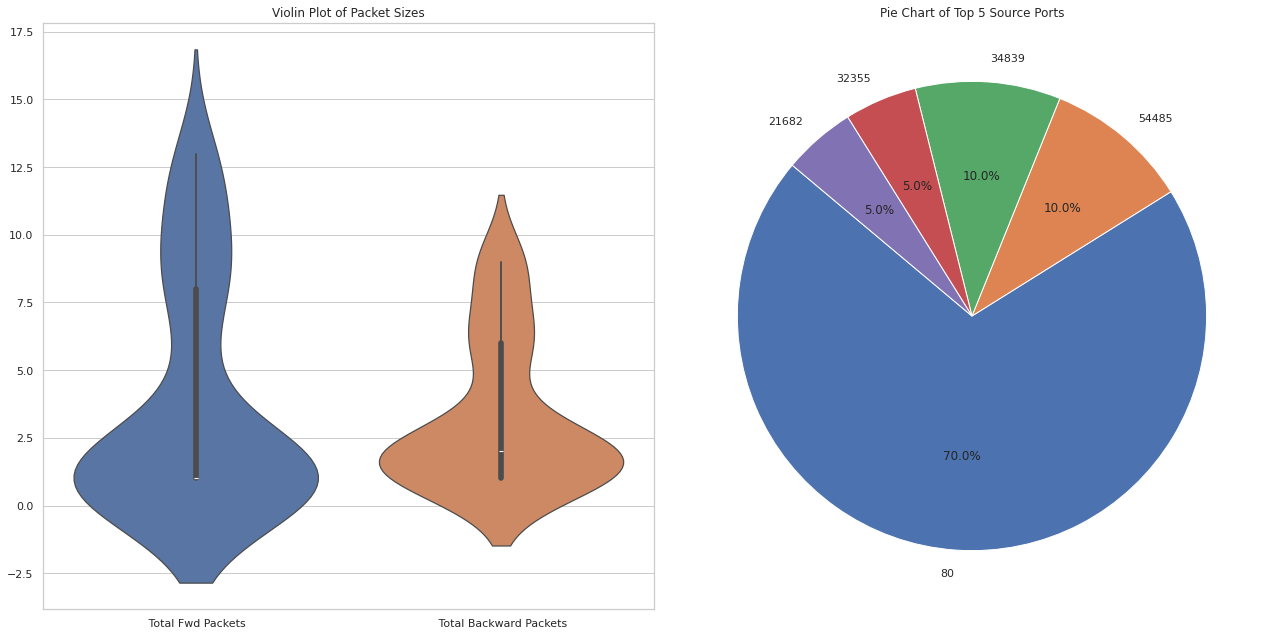

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = './class_split/WebDDoS.csv'
data = pd.read_csv(file_path)

# 设置绘图样式
sns.set(style="whitegrid")

# 创建图形框架，一行两列
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# 小提琴图：前向包大小与反向包大小
sns.violinplot(data=data[[' Total Fwd Packets', ' Total Backward Packets']], ax=axes[0])
axes[0].set_title('Violin Plot of Packet Sizes')

# 选择源端口和目的端口的频率最高的前5个端口
top_src_ports = data[' Source Port'].value_counts().nlargest(5)
top_dst_ports = data[' Destination Port'].value_counts().nlargest(5)

# 圆饼图：显示源端口的计数
axes[1].pie(top_src_ports, labels=top_src_ports.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart of Top 5 Source Ports')

plt.tight_layout()
plt.savefig("violin_pie.png")
plt.show()



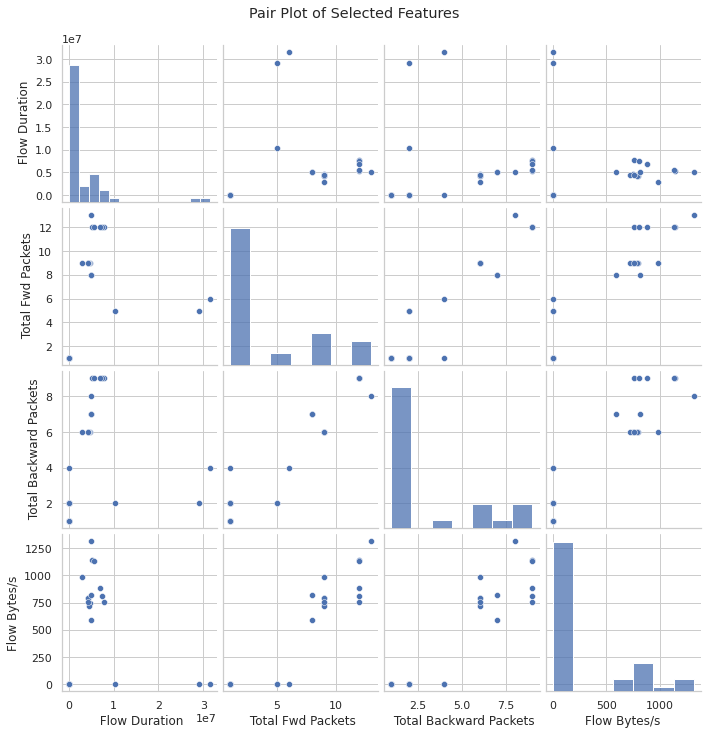

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
file_path = './class_split/WebDDoS.csv'
data = pd.read_csv(file_path)

# 数据清洗，处理可能的无穷大或不合理的值
data['Flow Bytes/s'] = pd.to_numeric(data['Flow Bytes/s'], errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(0)

# 选择几个数值变量进行分析
selected_columns = [' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Flow Bytes/s']
selected_data = data[selected_columns]

# 设置绘图样式
sns.set(style="whitegrid")

# 创建对角线分布图
pair_plot = sns.pairplot(selected_data)
pair_plot.fig.suptitle("Pair Plot of Selected Features", y=1.02)  # 添加总标题并调整位置
plt.savefig("pair_plot.png")
plt.show()
